# Bikeshare数据集上的特征工程

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为2011年的数据，要求预测2012年每天的单车共享数量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数
readme：数据说明文件

In [2]:
# 导入必要的工具包
# 数据读取及基本处理
import pandas as pd
import numpy as np

#模型
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
#LinearRegression  线性回归模型
#RidgeCV  岭回归模型   L2正则
#LassoCV   lasso模型   L1正则
#ElasticNetCV    L1和L2正则额合并


#模型评估
from sklearn.metrics import mean_squared_error # 评价均方误差
from sklearn.metrics import r2_score  #评价回归预测模型的性能

#可视化
import matplotlib.pyplot as plt

In [3]:
# 读入处理完数据工程的数据
data = pd.read_csv("FE_day.csv")
#显示头5行
data.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,holiday_0,holiday_1,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,1,0,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,1,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,1,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,1,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,1,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


In [5]:
#选取2011年的数据作为训练数据
train = data[data.yr ==0]
#删除记录号和年份的字段
train.drop(['instant','yr'],axis=1,inplace = True)
#inplace = True  不创建新对象  直接对原来的对象更改

#查看有多少行列
print("train : " + str(train.shape))

#拿到测试集
test = data[data.yr == 1]
#从测试集获取记录号
testID = test['instant']
#删除记录号和年份的字段
test.drop(['instant','yr'],axis=1, inplace = True)
#inplace = True  不创建新对象  直接对原来的对象更改

#查看有多少行列
print("test : " + str(test.shape))

train : (365, 28)
test : (366, 28)


/home/chenhafoen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/chenhafoen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
#查看训练集的头5行信息
train.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_3,holiday_0,holiday_1,temp,atemp,hum,windspeed,holiday,workingday,cnt
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0.355170,0.373517,0.828620,0.284606,0,0,985
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0.379232,0.360541,0.715771,0.466215,0,0,801
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0.171000,0.144830,0.449638,0.465740,0,1,1349
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0.175530,0.174649,0.607131,0.284297,0,1,1562
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0.209120,0.197158,0.449313,0.339143,0,1,1600


**准备训练数据**

In [7]:
#从训练集中拿出租车的人数为y轴
y_train = train["cnt"]
#从训练集中删除租车人数的字段作为x轴
X_train = train.drop(['cnt'], axis = 1)

#从测试集中拿出租车的人数为y轴
y_test = test["cnt"]
#从测试集中删除租车人数的字段作为x轴
X_test = test.drop(['cnt'], axis = 1)

In [12]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化对目标值的标准化器
# 对y标准化不是必须，但对其进行标准化可以使得不同问题w的取值范围相对相同

#自己实现试试...,这些参数需要保留，对测试集预测完后还需要对其进行反变换

#从训练集中拿到平均值
mean_y = y_train.mean()
#从训练集中拿到方差
std_y = y_train.std()


#标准化处理y轴的训练集
y_train = (y_train - mean_y)/std_y

#标准化处理y轴的测试集
y_test = (y_test - mean_y)/std_y

#从标准化的训练集中拿出均值
mean_train_y = y_train.mean()
#mean_train_y = 0

#从标准化的测试集中拿出均值
mean_test_y = y_test.mean()
#mean_test_y 1.5914175510574322

#算出相差
mean_diff = mean_test_y - mean_train_y;

print("mean y diff :", mean_diff)
#ss_y = StandardScaler()
#y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
#y_test = ss_y.transform(y_test.reshape(-1, 1))

1.59141755106
('mean y diff :', 1.5914175510574322)


模型相差比较大

**1* Linear Regression without regularization**                                                               
最小二乘线性回归                                                                                    
最小二乘没有超参数需要调优，直接用全体训练数据训练模型

In [13]:
# Linear Regression
# 1. 生成学习器实例
lr = LinearRegression()

#2. 在训练集上训练学习器
lr.fit(X_train, y_train)

#3.训练上测试，得到训练误差，实际任务中这一步不需要
# Look at predictions on training and validation set

#预测训练集上的数据
y_train_pred = lr.predict(X_train)
#预测测试集的数据
y_test_pred = lr.predict(X_test)
#在测试集加上误差
y_test_pred += mean_diff

#算出训练集的平方根
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
#mean_squared_error(y_train,y_train_pred)       计算出训练集结果   和训练集预测结果的均方误差

rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
#mean_squared_error(y_test,y_test_pred)    计算出測試集结果   和训练集预测结果的均方误差

#标准误差  越小越好
print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :", rmse_test)

#模型评价   越大越好
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

('RMSE on Training set :', 0.3998085838123174)
('RMSE on Test set :', 0.7499822695962082)
('r2_score on Training set :', 0.8397139564646869)
('r2_score on Test set :', 0.6648770553494541)


**2* Linear Regression with Ridge regularization (L2 penalty)**

In [14]:
#RidgeCV缺省的score是mean squared errors 
# 1. 生成学习器实例
# RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

#定义网格的范围
alphas = [0.01, 0.1, 1, 10, 100, 1000]
#实例化
ridge = RidgeCV(alphas = alphas,store_cv_values=True )
#alphas = alphas  网格的范围
#store_cv_values=True  把结果保存下来

# 2. 用训练数据度模型进行训练
# RidgeCV采用的是广义交叉验证（Generalized Cross-Validation），留一交叉验证（N-折交叉验证）的一种有效实现方式
ridge.fit(X_train, y_train)

#通过交叉验证得到的最佳超参数alpha
alpha = ridge.alpha_
print("Best alpha :", alpha)

# 交叉验证估计的测试误差
mse_cv = np.mean(ridge.cv_values_, axis = 0)#拿到平均值
rmse_cv = np.sqrt(mse_cv)#拿到平方根
#cv的标准误差
print("cv of rmse :", min(rmse_cv))

#训练上测试，训练误差，实际任务中这一步不需要
y_train_pred = ridge.predict(X_train)#预测训练集的结果
#拿到训练集的平方根
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
#mean_squared_error(y_train,y_train_pred)  训练集结果  和预测结果的均方误差

#预测
y_test_pred = ridge.predict(X_test)
#添加到误差中
y_test_pred += mean_diff
#拿到测试集的平方根
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
#mean_squared_error(y_train,y_train_pred)  测试集结果  和预测结果的均方误差

#标准误差  越小越好
print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :", rmse_test)

#模型评价   越大越好
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

('Best alpha :', 1.0)
('cv of rmse :', 0.4300950870912808)
('RMSE on Training set :', 0.4014248133437716)
('RMSE on Test set :', 0.7555605805897505)
('r2_score on Training set :', 0.8384154217572806)
('r2_score on Test set :', 0.6598732775690875)


Ridge picked 27 features and eliminated the other 0 features


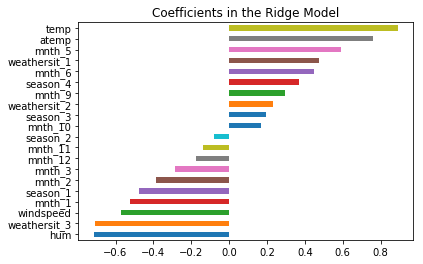

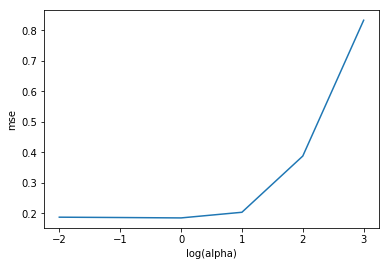

In [19]:
#调用panda的方法  使值变得有结构
coefs = pd.Series(ridge.coef_, index = X_train.columns)
#ridge.coef_   模型里面的系数
#index = X_train.columns  各个索引

print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

#画成直方图 
imp_coefs.plot(kind = "barh")
#定义标题
plt.title("Coefficients in the Ridge Model")

#展示
plt.show()

#获取平均值
mse_mean = np.mean(ridge.cv_values_, axis = 0)
#ridge.cv_values_  模型里保存的值

#画出线性图
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
#np.log10(alphas)   算出alphas 是10的多少此房  x轴
# mse_mean.reshape(len(alphas),1)           alphas 长度的平均值

#设置x轴的名字
plt.xlabel('log(alpha)')
#設置y轴的名字
plt.ylabel('mse')
#展示
plt.show()

**3* Linear Regression with Lasso regularization (L1 penalty)**

('Best alpha :', 0.0005435137156194457)


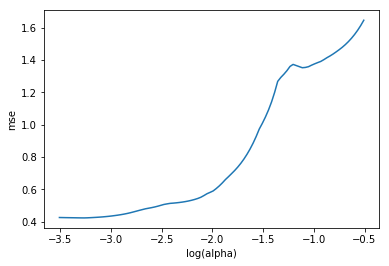

('cv of rmse :', 0.6497788514676233)
Lasso picked 23 features and eliminated the other 4 features


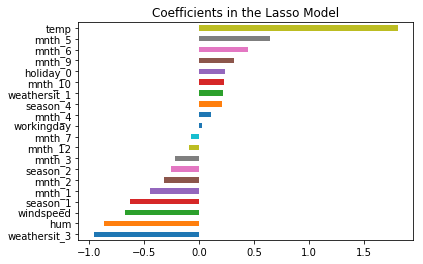

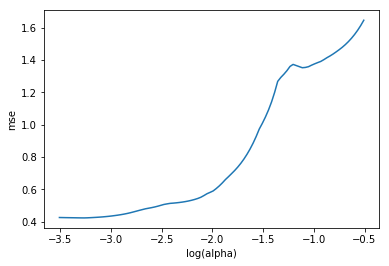

('RMSE on Training set :', 0.4000020083052106)
('RMSE on Test set :', 0.7528150349182138)
('r2_score on Training set :', 0.839558828498369)
('r2_score on Test set :', 0.6623406820338)


In [20]:
# 3* Lasso
lasso = LassoCV()

#训练数据
lasso.fit(X_train, y_train)
#拿出最好的alpha值
alpha = lasso.alpha_
print("Best alpha :", alpha)

#算出平均值
mses = np.mean(lasso.mse_path_, axis = 1)
#lasso.mse_path_  模型的均方误差

#画出图  
plt.plot(np.log10(lasso.alphas_), mses)
#np.log10(lasso.alphas_)  x轴  10的多少次方的值   mses上面计算的平均值
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
#x轴的名字
plt.xlabel('log(alpha)')
#y轴的名字
plt.ylabel('mse')
#展示
plt.show()    

#算出平均值
mse_cv = np.mean(lasso.mse_path_, axis = 1)
#lasso.mse_path_  模型的均方误差

#算出平方根
rmse_cv = np.sqrt(mse_cv)
#mse_cv  上面求出來的值

#最小的均方误差
print("cv of rmse :", min(rmse_cv))

# Plot important coefficients
#调用panda方法  拿到标注你的数据
coefs = pd.Series(lasso.coef_, index = X_train.columns)
#lasso.coef_  模型的系数
#index = X_train.columns  指定的索引

print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#调用panda的方法进行拼接
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

#画出直方图
imp_coefs.plot(kind = "barh")
#设置标题
plt.title("Coefficients in the Lasso Model")
#展示
plt.show()

#调用方法  获取平均值
mses = np.mean(lasso.mse_path_, axis = 1)
#lasso.mse_path_  模型的均方误差

#画出图
plt.plot(np.log10(lasso.alphas_), mses) 
#np.log10(lasso.alphas_)  x轴  10的多少次方
#mses  上述求得值    平均值
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
#设置x轴的名字
plt.xlabel('log(alpha)')
#设置y轴的名字
plt.ylabel('mse')
#展示
plt.show() 

#预测训练集
y_train_pred = lasso.predict(X_train)
#拿到测试集的平方根
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
#mean_squared_error(y_train,y_train_pred)  训练集结果  和预测结果的均方误差
print("RMSE on Training set :", rmse_train)

#预测测试集
y_test_pred = lasso.predict(X_test)
#添加误差
y_test_pred += mean_diff

#拿到测试集的平方根
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
#mean_squared_error(y_train,y_train_pred)  测试集结果  和预测结果的均方误差
print("RMSE on Test set :", rmse_test)

#计算出模型的评分
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

## 对测试集进行测试，生成提交文件

In [22]:
#调用模型预测结果
y_test_pred = lasso.predict(X_test)
y_test_pred += mean_diff

#预测值得结果  * 均方误差 +平均数
y_test_pred = y_test_pred * std_y +  mean_y

#生成提交测试结果
df = pd.DataFrame({"instant":testID, 'cnt':y_test_pred})
#df.reindex(columns=['instant'])
#y = pd.Series(data = y_test_pred, name = 'cnt')
#df = pd.concat([testID, y], axis = 1, ignore_index=True)
df.to_csv('submission.csv')